# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

Confusion_matirx : [[10000, 100], [0, 0]]
F1 score : 0.995024875622
Accuracy Score : 0.990099009901
AUC score : 0.488299


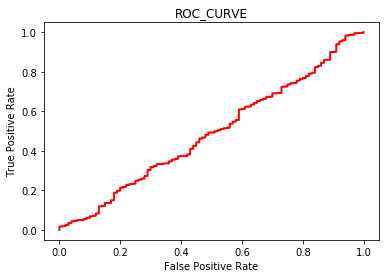

In [55]:
import matplotlib.pyplot as plt
data_c = pd.read_csv('5_a.csv')
data_c['pred'] = np.NaN
for index in range(len(data_a)):
    data_c['pred'][index] = 0 if data_c['proba'][index] < 0.5 else 1

#computing the confusion matrix elements
TP = ((data_c['y'] == 1.0) & (data_c['pred'] == 1.0)).sum()
TN = ((data_c['y'] == 0.0) & (data_c['pred'] == 0.0)).sum()
FP = ((data_c['y'] == 0.0) & (data_c['pred'] == 1.0)).sum()
FN = ((data_c['y'] == 1.0) & (data_c['pred'] == 0.0)).sum()
confusion_matrix = [[0,0],[0,0]]
confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1] = TP,FP,FN,TN
print('Confusion_matirx : {}'.format(confusion_matrix))

#f1_score
recoil = float(TP)/(TP+FN)
precision = float(TP) / (TP+FP)
f1_score = (2 * recoil * precision )/(recoil + precision)
print('F1 score : {}'.format(f1_score))

#Accuracy_score
accuracy_score = (float(TP) + TN )/ (TP+FP+FN+TN)
print('Accuracy Score : {}'.format(accuracy_score))

#AUC
thresholds = sorted(data_c['proba'].unique(),reverse=True)
tpr_array = []
fpr_array = []

for thr in thresholds:
    data_c['pred'] = [0 if x<thr else 1 for x in data_c['proba']]
    tp = ((data_c['y'] == 1.0) & (data_c['pred'] == 1.0)).sum()
    tn = ((data_c['y'] == 0.0) & (data_c['pred'] == 0.0)).sum()
    fp = ((data_c['y'] == 0.0) & (data_c['pred'] == 1.0)).sum()
    fn = ((data_c['y'] == 1.0) & (data_c['pred'] == 0.0)).sum()
    tpr = float(tp)/(tp+fn)
    fpr = float(fp)/(fp+tn)
    tpr_array.append(tpr)
    fpr_array.append(fpr)
AUC = np.trapz(tpr_array, fpr_array)
print('AUC score : {}'.format(AUC))
plt.plot(fpr_array,tpr_array,color='red',lw=2,label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

Confusion_matirx : [[55, 239], [45, 9761]]
F1 score : 0.279187817259
Accuracy Score : 0.971881188119
AUC score : 0.937757


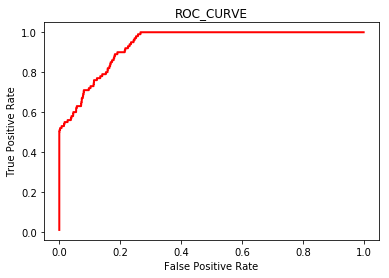

In [57]:
import matplotlib.pyplot as plt
data_c = pd.read_csv('5_b.csv')
data_c['pred'] = np.NaN
for index in range(len(data_a)):
    data_c['pred'][index] = 0 if data_c['proba'][index] < 0.5 else 1

#computing the confusion matrix elements
TP = ((data_c['y'] == 1.0) & (data_c['pred'] == 1.0)).sum()
TN = ((data_c['y'] == 0.0) & (data_c['pred'] == 0.0)).sum()
FP = ((data_c['y'] == 0.0) & (data_c['pred'] == 1.0)).sum()
FN = ((data_c['y'] == 1.0) & (data_c['pred'] == 0.0)).sum()
confusion_matrix = [[0,0],[0,0]]
confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1] = TP,FP,FN,TN
print('Confusion_matirx : {}'.format(confusion_matrix))

#f1_score
recoil = float(TP)/(TP+FN)
precision = float(TP) / (TP+FP)
f1_score = (2 * recoil * precision)/(recoil + precision)
print('F1 score : {}'.format(f1_score))

#Accuracy_score
accuracy_score = (float(TP) + TN )/ (TP+FP+FN+TN)
print('Accuracy Score : {}'.format(accuracy_score))

#AUC
thresholds = sorted(data_c['proba'].unique(),reverse=True)
tpr_array = []
fpr_array = []

for thr in thresholds:
    data_c['pred'] = [0 if x<thr else 1 for x in data_c['proba']]
    tp = ((data_c['y'] == 1.0) & (data_c['pred'] == 1.0)).sum()
    tn = ((data_c['y'] == 0.0) & (data_c['pred'] == 0.0)).sum()
    fp = ((data_c['y'] == 0.0) & (data_c['pred'] == 1.0)).sum()
    fn = ((data_c['y'] == 1.0) & (data_c['pred'] == 0.0)).sum()
    tpr = float(tp)/(tp+fn)
    fpr = float(fp)/(fp+tn)
    tpr_array.append(tpr)
    fpr_array.append(fpr)
AUC = np.trapz(tpr_array, fpr_array)
print('AUC score : {}'.format(AUC))
plt.plot(fpr_array,tpr_array,color='red',lw=2,label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [52]:
import sys
import warnings
warnings.filterwarnings('ignore')

data_c = pd.read_csv('5_c.csv')
#print(data_c['y'].value_counts())
data_c['pred'] = np.NaN

min_A = sys.maxint
min_thr = 1.1
thresholds = data_c['prob'].unique()
for thr in thresholds:
    data_c['pred'] = [0 if x<thr else 1 for x in data_c['prob']]
    false_pos = ((data_c['y'] == 0.0) & (data_c['pred'] == 1.0)).sum()
    false_neg = ((data_c['y'] == 1.0) & (data_c['pred'] == 0.0)).sum()
    A = (500 * false_neg) + (100 * false_pos)
    if(A < min_A):
        min_A = A
        min_thr = thr
print('The best threshold is : {}'.format(min_thr))


The best threshold is : 0.230039027897


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [16]:

data_a = pd.read_csv('5_d.csv')

#Mean Squared Error
MSE = 0
err_sum = 0
for index,rows in data_a.iterrows():
    err = abs(rows['y'] - rows['pred'])
    MSE += (err)**2
    err_sum += err
MSE = float(MSE)/len(data_a)
print('Mean Square Error : {}'.format(MSE))

#MAPE
MAPE = float(err_sum)/data_a['y'].sum()
print('MAPE : {}'.format(MAPE))

#R^2 error
R_sqr = 0
mu = data_a['y'].mean()
SStot,SSreg = 0,0
for index,rows in data_a.iterrows():
    SStot += (rows['y'] - mu)**2
    SSreg += (rows['pred'] - mu)**2
R_sqr= SSreg/SStot
print('R_square error is : {}'.format(R_sqr))


Mean Square Error : 177.165699746
MAPE : 0.129120299401
R_square error is : 0.957338350708
